In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path=r"Fraud_check.csv"
df1=pd.read_csv(path)
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [4]:
df1=df1.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population',
              'Work.Experience':'Work_Experience',},axis=1)

In [5]:
df1

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
df1.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [7]:
df1.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
df1.loc[df1['Taxable_Income'] <= 30000, ['Taxable_Income1']]='Risky'
df1.loc[df1['Taxable_Income'] >= 30000, ['Taxable_Income1']]='Good'

In [9]:
df1

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income1
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [10]:
df1=df1.drop(['Taxable_Income'],axis=1,)
df1

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income1
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [11]:
categorical_columns=df1.select_dtypes(include=['object'])

In [12]:
categorical_columns

,Undergrad,Marital_Status,Urban,Taxable_Income1
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good
...,...,...,...,...
595,YES,Divorced,YES,Good
596,YES,Divorced,YES,Good
597,NO,Divorced,YES,Good
598,YES,Married,NO,Good


In [13]:
categorical_columns1=pd.get_dummies(df1,drop_first=True)
categorical_columns1

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Taxable_Income1_Risky
0,50047,10,0,0,1,1,0
1,134075,18,1,0,0,1,0
2,160205,30,0,1,0,1,0
3,193264,15,1,0,1,1,0
4,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,0
596,55369,2,1,0,0,1,0
597,154058,0,0,0,0,1,0
598,180083,17,1,1,0,0,0


In [14]:
categorical_columns.columns

Index(['Undergrad', 'Marital_Status', 'Urban', 'Taxable_Income1'], dtype='object')

In [15]:
df1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income1
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [16]:
df1.drop(columns=['Undergrad', 'Marital_Status', 'Urban', 'Taxable_Income1'],axis=1,inplace=True)
df1

,City_Population,Work_Experience
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28
...,...,...
595,39492,7
596,55369,2
597,154058,0
598,180083,17


In [17]:
df1=pd.concat([df1,categorical_columns1],axis=1)
df1

,City_Population,Work_Experience,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Taxable_Income1_Risky
0,50047,10,50047,10,0,0,1,1,0
1,134075,18,134075,18,1,0,0,1,0
2,160205,30,160205,30,0,1,0,1,0
3,193264,15,193264,15,1,0,1,1,0
4,27533,28,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,39492,7,1,0,0,1,0
596,55369,2,55369,2,1,0,0,1,0
597,154058,0,154058,0,0,0,0,1,0
598,180083,17,180083,17,1,1,0,0,0


In [18]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [19]:
print(X)

     City_Population  Work_Experience  City_Population  Work_Experience  \
0              50047               10            50047               10   
1             134075               18           134075               18   
2             160205               30           160205               30   
3             193264               15           193264               15   
4              27533               28            27533               28   
..               ...              ...              ...              ...   
595            39492                7            39492                7   
596            55369                2            55369                2   
597           154058                0           154058                0   
598           180083               17           180083               17   
599           158137               16           158137               16   

     Undergrad_YES  Marital_Status_Married  Marital_Status_Single  Urban_YES  
0                0  

In [20]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income1_Risky, Length: 600, dtype: uint8


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 8)
(120, 8)
(480,)
(120,)


In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [25]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=7)

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

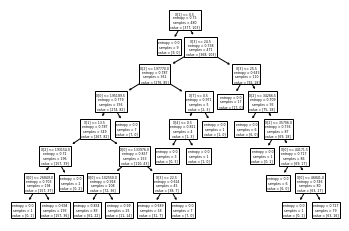

In [27]:
tree.plot_tree(model);

In [28]:
df1.columns

Index(['City_Population', 'Work_Experience', 'City_Population',
       'Work_Experience', 'Undergrad_YES', 'Marital_Status_Married',
       'Marital_Status_Single', 'Urban_YES', 'Taxable_Income1_Risky'],
      dtype='object')

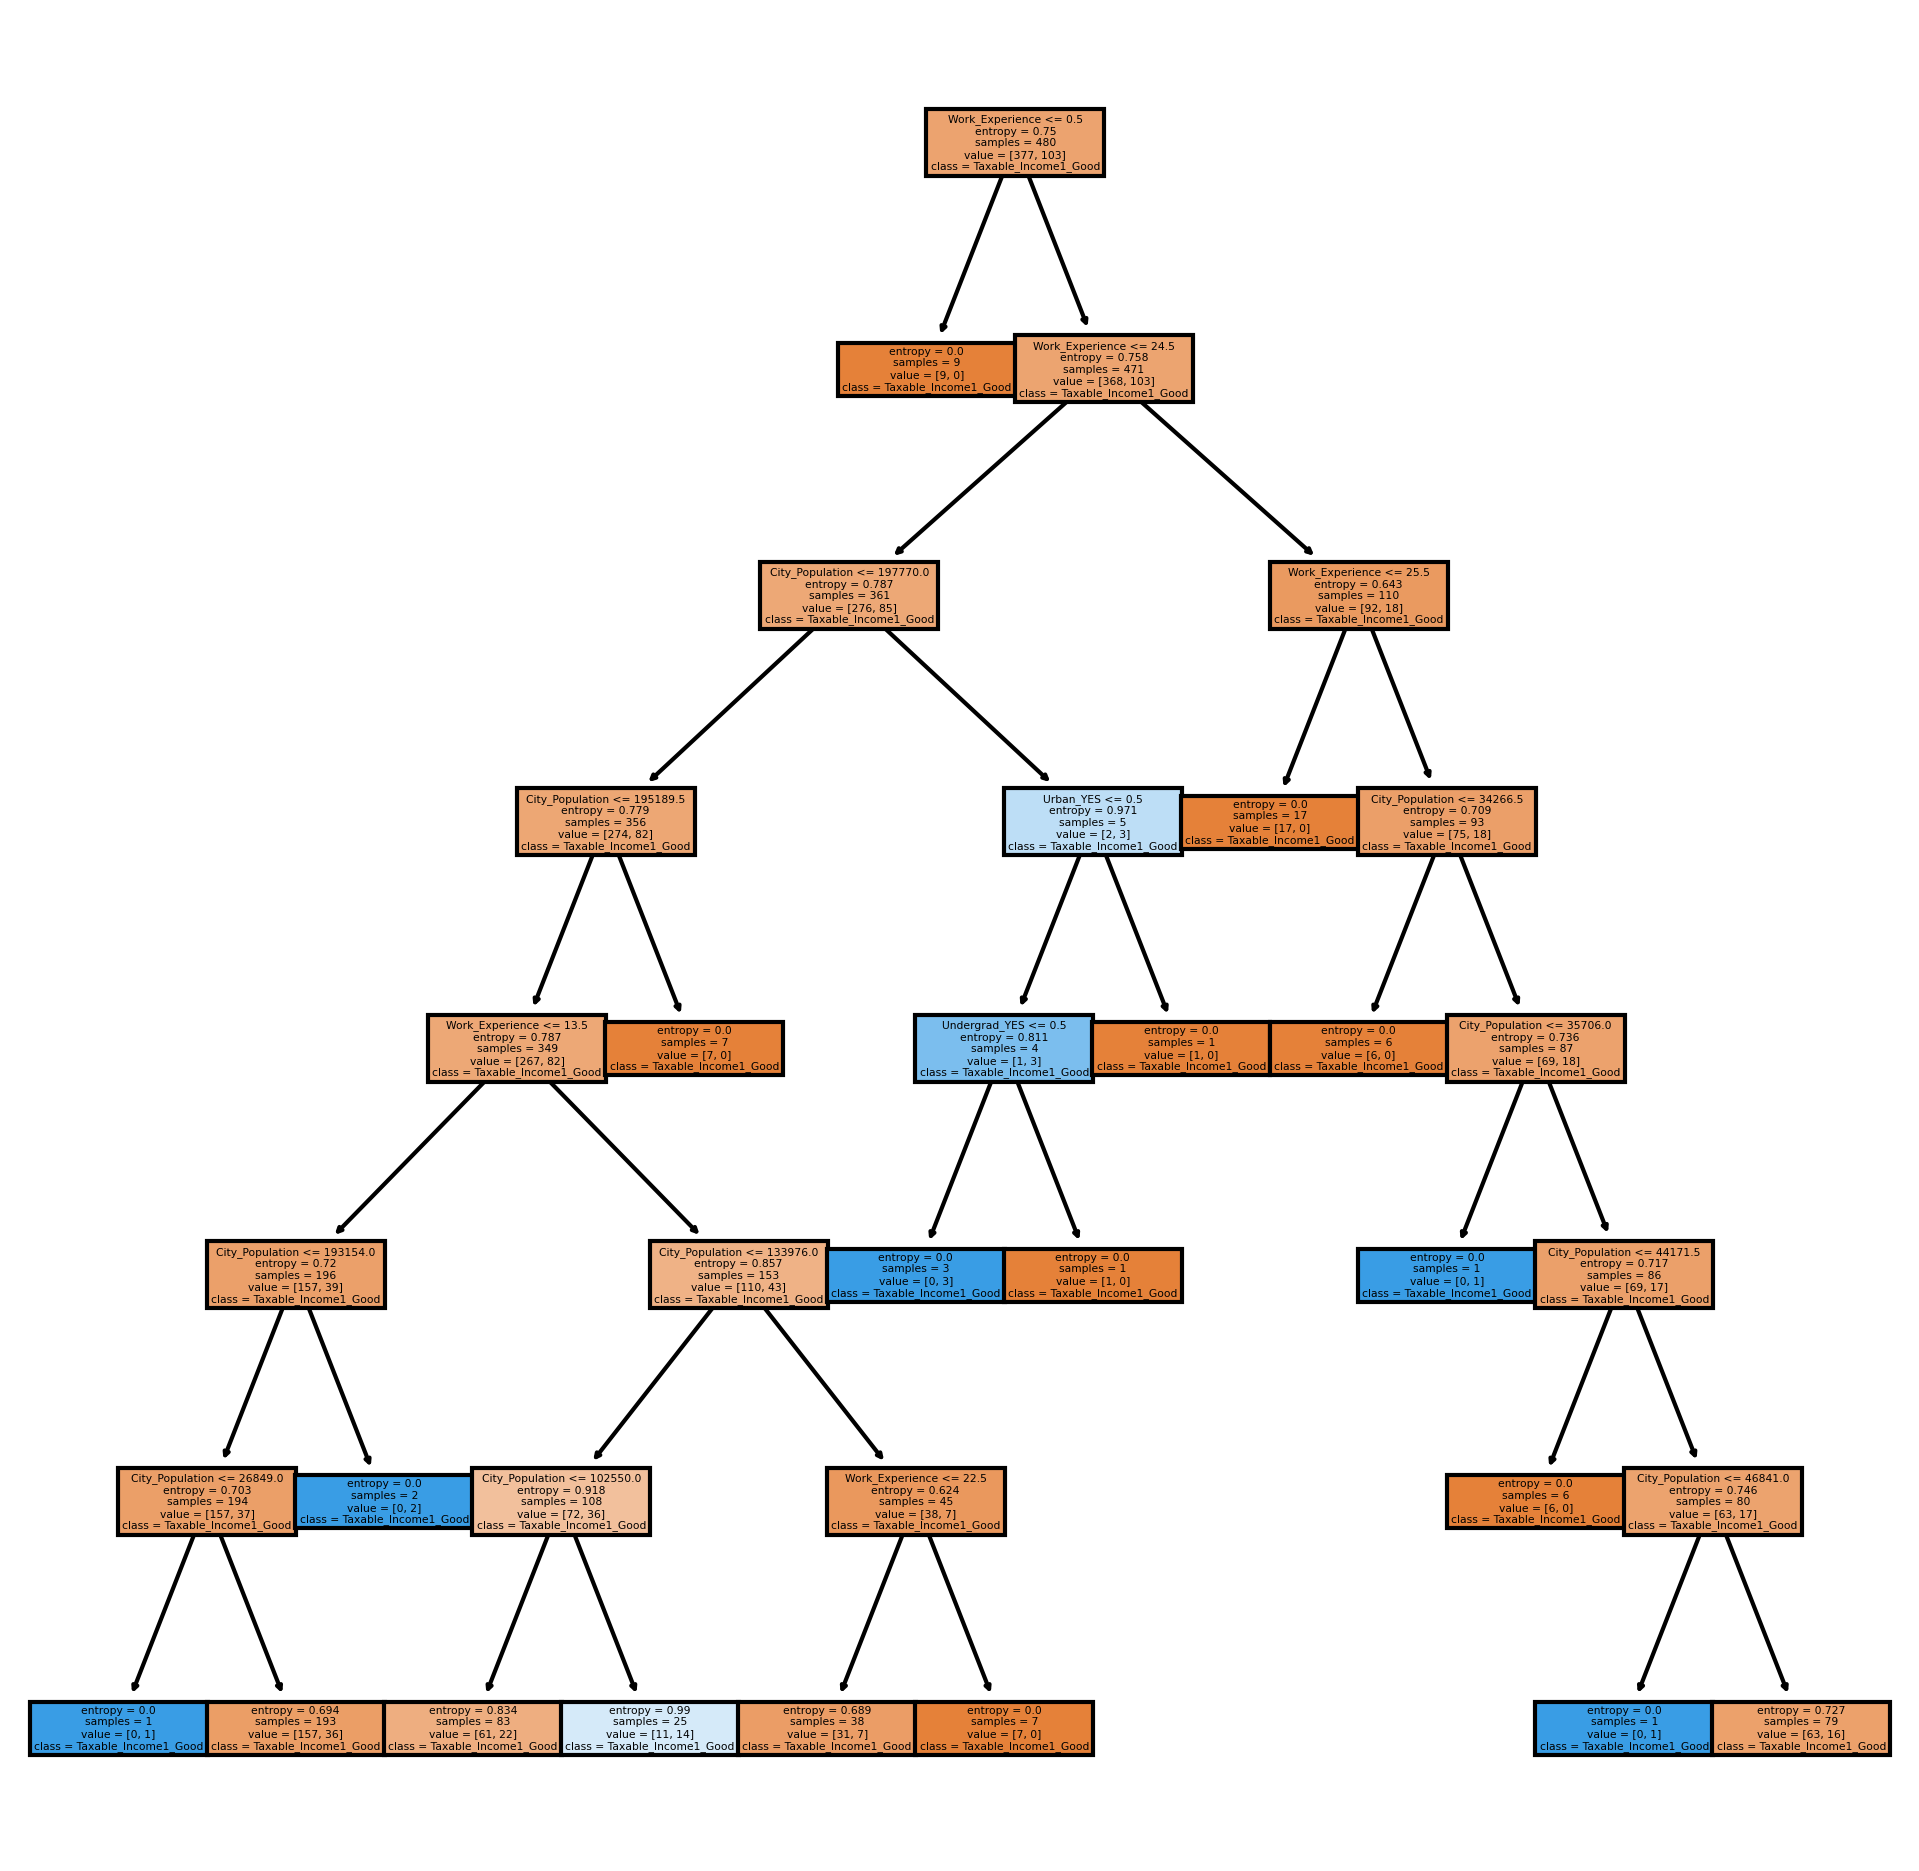

In [29]:
fn=['City_Population', 'Work_Experience', 'City_Population','Work_Experience', 'Undergrad_YES', 'Marital_Status_Married','Marital_Status_Single', 'Urban_YES',]
cn=['Taxable_Income1_Good','Taxable_Income1_Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

In [30]:
preds=model.predict(X_test)

In [31]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [32]:
np.mean(preds==y_test)

0.75

# Gini Criteria

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=7)

In [35]:
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [36]:
pred=model_gini.predict(X_test)

In [37]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [38]:
np.mean(y_test==pred)

0.725

# DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
df1

,City_Population,Work_Experience,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Taxable_Income1_Risky
0,50047,10,50047,10,0,0,1,1,0
1,134075,18,134075,18,1,0,0,1,0
2,160205,30,160205,30,0,1,0,1,0
3,193264,15,193264,15,1,0,1,1,0
4,27533,28,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,39492,7,1,0,0,1,0
596,55369,2,55369,2,1,0,0,1,0
597,154058,0,154058,0,0,0,0,1,0
598,180083,17,180083,17,1,1,0,0,0


In [41]:
df2=df1.copy()

In [42]:
df2

,City_Population,Work_Experience,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,Taxable_Income1_Risky
0,50047,10,50047,10,0,0,1,1,0
1,134075,18,134075,18,1,0,0,1,0
2,160205,30,160205,30,0,1,0,1,0
3,193264,15,193264,15,1,0,1,1,0
4,27533,28,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,39492,7,1,0,0,1,0
596,55369,2,55369,2,1,0,0,1,0
597,154058,0,154058,0,0,0,0,1,0
598,180083,17,180083,17,1,1,0,0,0


In [43]:
X=df2.iloc[:,:-1]

In [44]:
y=df2.iloc[:,-1]

In [45]:
print(X)

     City_Population  Work_Experience  City_Population  Work_Experience  \
0              50047               10            50047               10   
1             134075               18           134075               18   
2             160205               30           160205               30   
3             193264               15           193264               15   
4              27533               28            27533               28   
..               ...              ...              ...              ...   
595            39492                7            39492                7   
596            55369                2            55369                2   
597           154058                0           154058                0   
598           180083               17           180083               17   
599           158137               16           158137               16   

     Undergrad_YES  Marital_Status_Married  Marital_Status_Single  Urban_YES  
0                0  

In [46]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income1_Risky, Length: 600, dtype: uint8


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 8)
(120, 8)
(480,)
(120,)


In [49]:
model1=DecisionTreeRegressor()

In [50]:
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
pred=model1.predict(X_test)

In [52]:
pred

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [53]:
model1.score(X_test,y_test)

-1.6551226551226557